In [49]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [50]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-20 08:51:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  96.1MB/s    in 1.5s    

2020-08-20 08:51:46 (96.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [51]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-08-20 08:51:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  48.3MB/s    in 0.2s    

2020-08-20 08:51:48 (48.3 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



import os와 import zipfile을 이용해서 os library에서 압축을 해제한 파일을 불러와서 저장한다.



In [52]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [53]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

딥러닝 학습을 할 때에 제일 중요한 것은 올바른 shape와 size와 개수의 dataset을 만드는 것이다.

Data Preprocessing

ImageDataGenerator은 말 그대로 'image' 형태를 tf.float32의 tensor로 변형시킬 때 사용하는 것이지, tensor의 형태로 이미지가 저장되어 있는 데이터를 사용할 때에는 반드시 tf.image()형태의 함수를 사용해야 한다.

In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 10,
    zoom_range = 0.1,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)
test_datagen = ImageDataGenerator(
    rescale = 1/255.0
)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (128,128),
    batch_size = 128,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size = (128,128),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [91]:
print(train_generator[0][-1])

[0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0.]


다운 받은 자료를 plt를 이용해서 시각화를 진행해 본다.

우선 train_generator은 이미 array 상태이기 때문에 type나 shape를 변경시킬 필요는 없고, 다만 train_generator의 맨 마지막에 쭉 array형태로 label이 위에서 진행한 imagedatagenerator에서 binary mode로 저장되었기 때문에 이를 이용하면 된다.

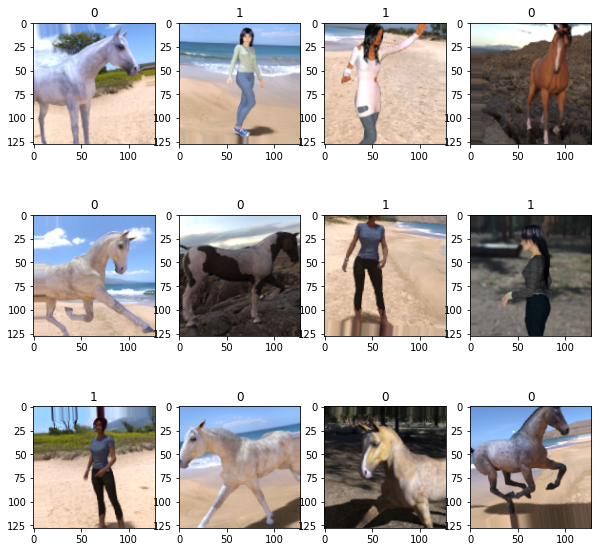

In [96]:
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.title('%s' %(str(int(train_generator[0][-1][i]))))
  plt.imshow(train_generator[0][0][i])

plt.subplot(a,b,c)라고 할 때 a와 b는 가로세로 간격이고 c가 중요한데, 다양한 이미지를 출력하고 싶을 떄 각 이미지의 위치를 지정해 주는 역할을 한다.

위의 flow_from_directory를 위해서는 자료의 저장 장소를 잘 기록해 놔야 한다. 예를 들면 path라는 변수를 이용해서 저장하는 것이 바람직하다.

class_mode는 이미지에 labeling을 어떻게 할 것인지를 저장하는 변수인데, 이 데이터의 경우 horse와 human,2개밖에 없기 때문에 0,1두개의 값으로 저장하는 'binary'로 설정해 줬다.

CNN Layer Model 만들기

In [97]:
model = tf.keras.Sequential()
#First Convolution
model.add(tf.keras.layers.Conv2D(input_shape = (128,128,3), activation = 'relu',filters = 16, kernel_size = (3,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
#Second Convolution
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.BatchNormalization())
#Third Convolution
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
#Flatten
model.add(tf.keras.layers.Flatten())
#Dense Layer
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)       

0,1 두개의 class로 label이 구성되어 있기 때문에 마지막 dense layer에서 sigmoid를 이용했다.

model compiling

In [98]:
adam_optimizer = tf.keras.optimizers.Adam(lr = 0.0001)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',patience = 100)
model.compile(loss = 'sparse_categorical_crossentropy',optimizer=adam_optimizer,metrics = ['accuracy'])

model.fit을 진행하는데 ImageDataGenerator을 이용해서 만든 것이기 때문에 fit_generator을 이용한다. 

In [100]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 20,
    callbacks = [early_stopping_callback])


Epoch 1/20
8/8 [==============================] - 18s 2s/step - loss: 0.4642 - accuracy: 0.8135
Epoch 2/20
8/8 [==============================] - 20s 2s/step - loss: 0.2567 - accuracy: 0.8954
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.2080 - accuracy: 0.9266
Epoch 4/20
8/8 [==============================] - 16s 2s/step - loss: 0.1881 - accuracy: 0.9321
Epoch 5/20
8/8 [==============================] - 15s 2s/step - loss: 0.1709 - accuracy: 0.9333
Epoch 6/20
8/8 [==============================] - 18s 2s/step - loss: 0.1422 - accuracy: 0.9512
Epoch 7/20
8/8 [==============================] - 18s 2s/step - loss: 0.1178 - accuracy: 0.9619
Epoch 8/20
8/8 [==============================] - 17s 2s/step - loss: 0.1143 - accuracy: 0.9633
Epoch 9/20
8/8 [==============================] - 20s 2s/step - loss: 0.0926 - accuracy: 0.9677
Epoch 10/20
8/8 [==============================] - 20s 2s/step - loss: 0.0841 - accuracy: 0.9744
Epoch 11/20
8/8 [======================

In [102]:
model.evaluate(validation_generator)

2/2 [==============================] - 1s 296ms/step - loss: 0.7867 - accuracy: 0.5586


[0.7867333889007568, 0.55859375]

Accuracy = 70.70%인데 만약에 epoch수를 늘렸다면 훨씬 더 나은 결과가 나왔을 것 같지만 GPU로 작동 하는데도 불구하고 너무 속도가 느려서 일단 10번만 시행했다.

-> 이후 epochs를 20번으로 늘려서 시행했더니 accuracy = 55.86%

오히려 더 줄었는데...이는 학습시킬 때 마다 바뀐다고 하니 나중에 다시 해봐야 할 것 같다